In [4]:
import os
import re
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import ast
import json
from glob import glob

In [5]:
class_names_kor = ['', '모름', '일반 행인', '낚시꾼', '동물','배']
class_names = ['bg','unknown', 'pedestrian', 'fishman', 'animal', 'ship']

num_classes = len(class_names_kor)
edgecolors = np.random.rand(num_classes, 3) 
edgecolors = np.minimum(edgecolors+0.1, 1.0)

In [6]:
folder_base = '/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/'
os.path.isdir(folder_base)

True

In [14]:
folder_annotation = folder_base + 'label/bbox/'
os.path.isdir(folder_annotation)

True

In [29]:
paths_annotation = glob(folder_annotation + '*.csv')
len(paths_annotation), paths_annotation

(2,
 ['/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/label/bbox/20210112 day.csv',
  '/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/label/bbox/20210112 night.csv'])

In [16]:
paths_annotation

['/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/label/bbox/20210112 day 251-500.csv',
 '/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/label/bbox/20210112 day.csv',
 '/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/label/bbox/20210112 night 251-500.csv',
 '/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/label/bbox/20210112 night.csv']

In [17]:
paths_img = glob(folder_base + '*/*')
paths_img = np.sort(paths_img)
len(paths_img)

1003

In [18]:
img_shift = []
for i in range(307, 310):
    path_img = '/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/'
    path_img += str(i) + '.png'
    img = Image.open(path_img)
    img_l = img.convert("L")
    img_shift.append(img_l)
    print(os.path.isfile(path_img))


True
True
True


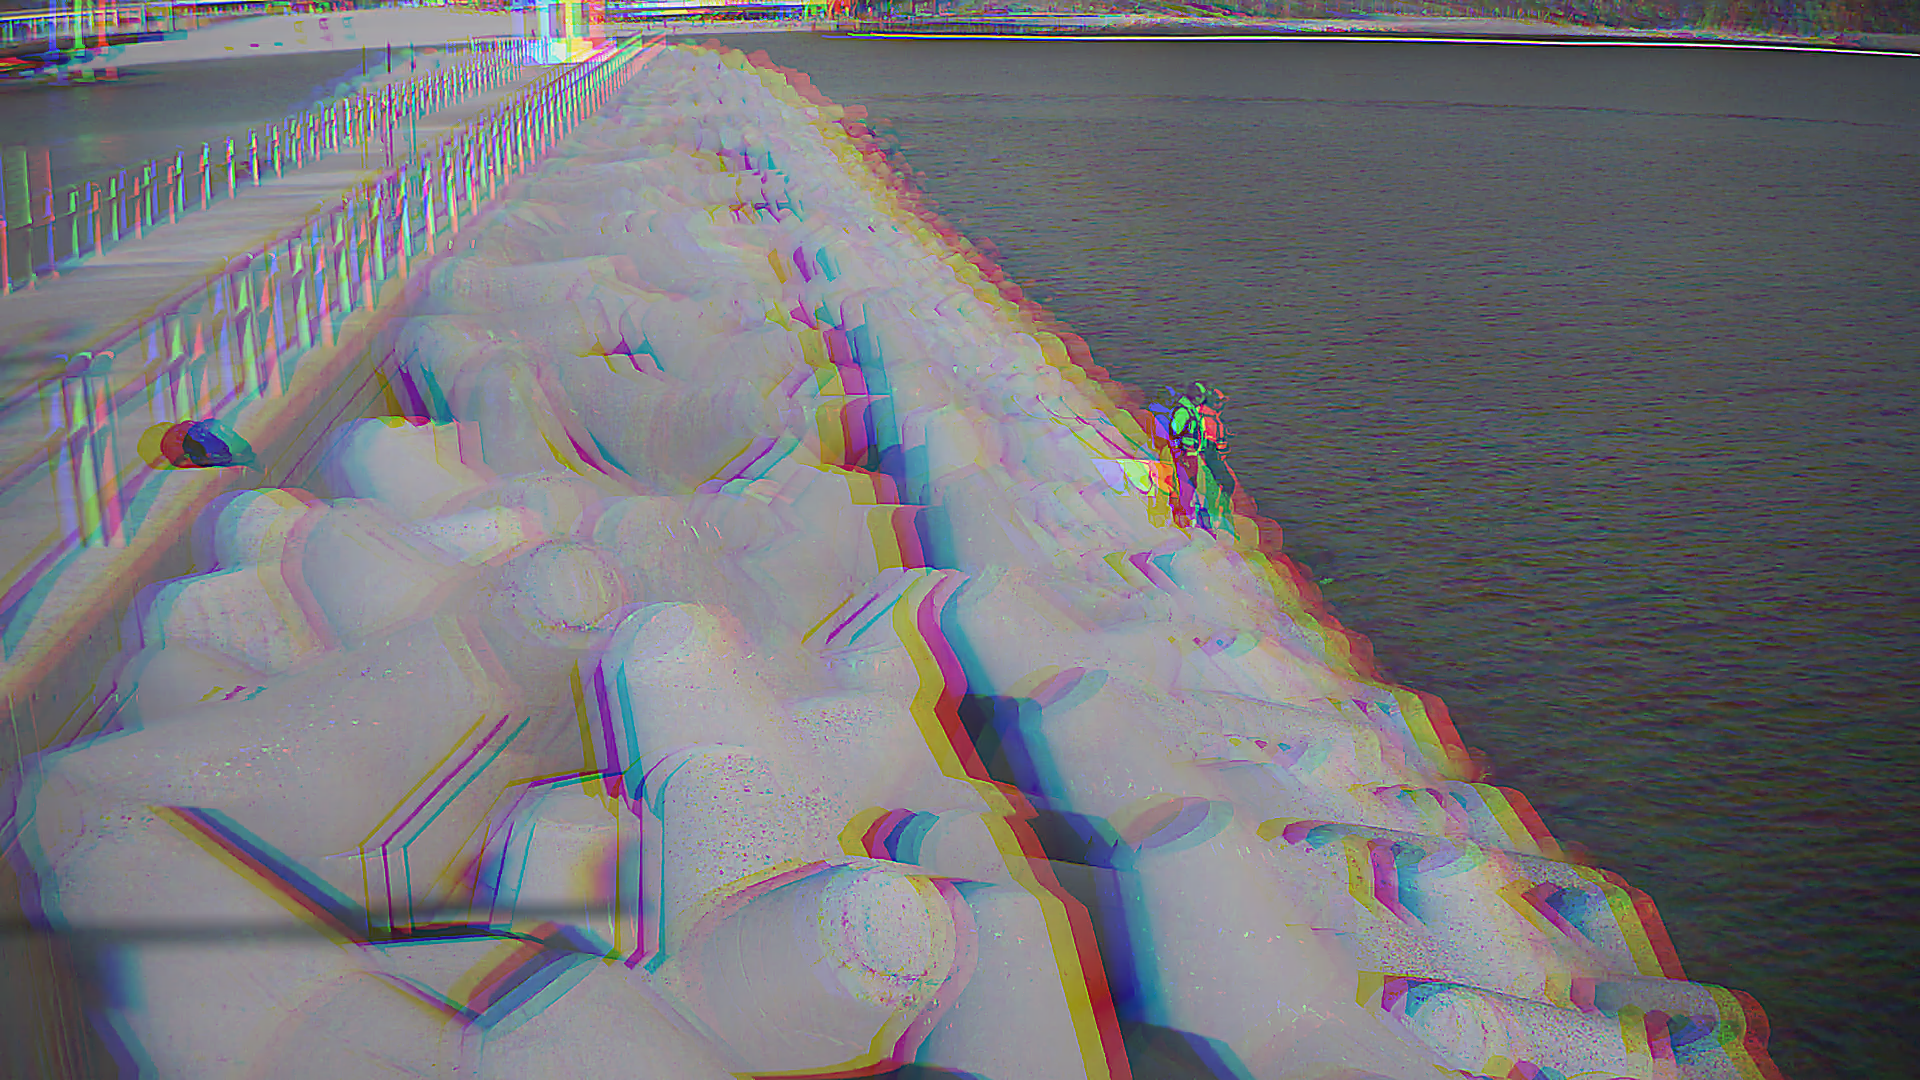

In [19]:
img_shift = np.stack(img_shift, -1)
img_shift = Image.fromarray(img_shift)

img_shift

In [20]:
#img_shift.save('img_shift.png')

In [21]:
dict_img_path = dict()
offset_sub_path = len(folder_base)
for path_img in paths_img:
    path_sub = path_img[offset_sub_path:]    
    dict_img_path[path_sub] = path_img
    
len(dict_img_path)

1003

In [22]:
len(folder_base)

67

In [23]:
dict_img_path

{'20210112 day/0.png': '/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/0.png',
 '20210112 day/1.png': '/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/1.png',
 '20210112 day/10.png': '/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/10.png',
 '20210112 day/100.png': '/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/100.png',
 '20210112 day/101.png': '/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/101.png',
 '20210112 day/102.png': '/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/102.png',
 '20210112 day/103.png': '/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/103.png',
 '20210112 day/104.png': '/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/104.png',
 '20210112 day/105.png': '/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyou

In [34]:
def read_df(path_csv):
    
    if path_csv.endswith('xlsx'):
        df = pd.read_excel(path_csv)
    else:
        df = pd.read_csv(path_csv)
    
    print(path_csv.split(os.sep)[-1],  df.shape)
    return df

In [35]:
list_df = []
for path_anno in paths_annotation:
    df = read_df(path_anno)
    
    csv_file_name = path_anno.split(os.sep)[-1][:-4]
    df['folder'] = csv_file_name
    list_df.append(df)
len(list_df)

20210112 day.csv (581, 7)
20210112 night.csv (549, 7)


2

In [37]:
df = pd.concat(list_df, axis=0, ignore_index=True)
df.shape

(1130, 8)

In [38]:
df.region_attributes.unique()

array(['{}', '{"class":"배"}', '{"class":"낚시꾼"}', '{"class":"동물"}',
       '{"class":"일반 행인"}'], dtype=object)

In [39]:
df.region_attributes.value_counts()

{}                   738
{"class":"일반 행인"}    165
{"class":"낚시꾼"}      106
{"class":"동물"}        96
{"class":"배"}         25
Name: region_attributes, dtype: int64

In [40]:
df['path_img'] = df.folder + os.sep + df.filename

In [41]:
df

filename  file_size file_attributes  region_count  region_id  \
0       0.png    3224515              {}             0          0   
1       1.png    3239568              {}             0          0   
2       2.png    3234077              {}             0          0   
3       3.png    3243417              {}             0          0   
4       4.png    3248339              {}             0          0   
...       ...        ...             ...           ...        ...   
1125  495.png     357755              {}             0          0   
1126  496.png     353915              {}             0          0   
1127  497.png     358520              {}             0          0   
1128  498.png     357286              {}             0          0   
1129  499.png     361461              {}             0          0   

     region_shape_attributes region_attributes          folder  \
0                         {}                {}    20210112 day   
1                         {}                {}    20210112 day   
2                         {}                {}    20210112 day   
3                         {}                {}    20210112 day   
4                         {}                {}    20210112 day   
...                      ...               ...             ...   
1125                      {}                {}  20210112 night   
1126                      {}                {}  20210112 night   
1127                      {}                {}  20210112 night   
1128                      {}                {}  20210112 night   
1129                      {}                {}  20210112 night   

                    path_img  
0         20210112 day/0.png  
1         20210112 day/1.png  
2         20210112 day/2.png  
3         20210112 day/3.png  
4         20210112 day/4.png  
...                      ...  
1125  20210112 night/495.png  
1126  20210112 night/496.png  
1127  20210112 night/497.png  
1128  20210112 night/498.png  
1129  20210112 night/499.png  

[1130 rows x 9 columns]

In [42]:
#media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 night
df['path_img_full'] = None
for i in range(len(df)):
    row = df.iloc[i]
    path_img = row.path_img
    if path_img in dict_img_path.keys():
        df.loc[i, 'path_img_full'] = dict_img_path[path_img]
        print(dict_img_path[path_img])
    else:
        print('not exist', path_img)

/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/0.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/1.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/2.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/3.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/4.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/5.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/6.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/7.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/8.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/9.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/10.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tong

/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/438.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/439.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/440.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/441.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/442.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/443.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/444.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/445.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/446.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/447.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 day/448.png
/media/mvlab/46FA9CA2FA9C8FB3/da

/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 night/403.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 night/404.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 night/405.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 night/406.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 night/407.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 night/408.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 night/409.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 night/410.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 night/411.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 night/412.png
/media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestrian/Tongyoung/segment/20210112 night/413.png
/media/mvl

In [43]:
df.path_img_full.nunique()

1000

In [44]:
df

filename  file_size file_attributes  region_count  region_id  \
0       0.png    3224515              {}             0          0   
1       1.png    3239568              {}             0          0   
2       2.png    3234077              {}             0          0   
3       3.png    3243417              {}             0          0   
4       4.png    3248339              {}             0          0   
...       ...        ...             ...           ...        ...   
1125  495.png     357755              {}             0          0   
1126  496.png     353915              {}             0          0   
1127  497.png     358520              {}             0          0   
1128  498.png     357286              {}             0          0   
1129  499.png     361461              {}             0          0   

     region_shape_attributes region_attributes          folder  \
0                         {}                {}    20210112 day   
1                         {}                {}    20210112 day   
2                         {}                {}    20210112 day   
3                         {}                {}    20210112 day   
4                         {}                {}    20210112 day   
...                      ...               ...             ...   
1125                      {}                {}  20210112 night   
1126                      {}                {}  20210112 night   
1127                      {}                {}  20210112 night   
1128                      {}                {}  20210112 night   
1129                      {}                {}  20210112 night   

                    path_img  \
0         20210112 day/0.png   
1         20210112 day/1.png   
2         20210112 day/2.png   
3         20210112 day/3.png   
4         20210112 day/4.png   
...                      ...   
1125  20210112 night/495.png   
1126  20210112 night/496.png   
1127  20210112 night/497.png   
1128  20210112 night/498.png   
1129  20210112 night/499.png   

                                          path_img_full  
0     /media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestri...  
1     /media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestri...  
2     /media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestri...  
3     /media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestri...  
4     /media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestri...  
...                                                 ...  
1125  /media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestri...  
1126  /media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestri...  
1127  /media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestri...  
1128  /media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestri...  
1129  /media/mvlab/46FA9CA2FA9C8FB3/dataset/pedestri...  

[1130 rows x 10 columns]

In [45]:
annotation = dict()
box_count = 0
for i in range(len(df)):
    
    sample_row = df.iloc[i]
    filename = sample_row['path_img_full']    
    box = sample_row['region_shape_attributes']    
    region_attributes = sample_row['region_attributes'] 
    
    if '(' in filename:
        print('()', filename)
    try:
        box_map = ast.literal_eval(box)    
        region_attributes = ast.literal_eval(region_attributes)        
    except:
        print('except filename',i, filename)
        print('box', box)
        print('region_attributes', region_attributes)
        continue
    
    if len(box_map.keys())<1 or len(region_attributes.keys())<1 :
        #print(i, 'no_keys_skip', filename.split(os.sep)[-1])
        continue
        
    cls = region_attributes['class']
    if cls in class_names_kor:
        cls_num = class_names_kor.index(cls)
    elif cls in class_names:
        cls_num = class_names.index(cls)
    else:
        print('cls unknown', cls)
        print('filename', filename)
        continue
        #xit()
        
    x0 = box_map['x']
    y0 = box_map['y']
    width = box_map['width']
    height = box_map['height']    
       
    bbox = [cls_num, x0, y0, x0 + width, y0 + height]
    
    if filename not in annotation.keys():
        annotation[filename] = []
    
    annotation[filename].append(bbox)
    box_count += 1
    

In [47]:
len(annotation), box_count, len(annotation) * 50 + box_count * 30

(262, 392, 24860)

In [48]:
def load_annotation():
    input_list = []
    bbox_list = []
    path_list = []
    for path_image in annotation:
        cls_bbox = annotation[path_image]
        cls_bbox = np.array(cls_bbox).reshape([-1, 5])
        cls = cls_bbox[:, 0:1]
        bbox = np.array(cls_bbox[:, 1:])
       
        
        img = Image.open(path_image)    
        #img = img.resize((1000,500))

        scale = np.array((img.width, img.height, img.width, img.height))
        scale = np.reshape(scale, (1, 4))       
        #print(key, cls, cls_bbox.dtype, cls_bbox, 'wh',img.width, img.height)
        img_arr = np.array(img)    
        bbox_norm = bbox.astype(np.float) / scale.astype(np.float)
        cls = np.array(cls).reshape((-1, 1))
        cls_bbox_norm = np.concatenate((cls, bbox_norm), axis=1)

        input_list.append(img_arr)
        bbox_list.append(cls_bbox_norm)
        path_list.append(path_image)
        if len(input_list)%100==0:        
            print(len(annotation), len(input_list), len(bbox_list))   
        
    print(len(input_list), len(bbox_list))
    return input_list, bbox_list
    
input_x, input_y = load_annotation()

262 100 100
262 200 200
262 262


In [50]:
len(input_x), len(input_y)

(262, 262)

In [51]:
def crop_bbox_image(image, boxes):
    img_objects = []
    image = np.array(image)
    for box in boxes:        
        box = box.astype(np.int)
        x1, y1, x2, y2 = box
        w = x2 - x1
        h = y2 - y1        
        crop_image_arr = image[y1:y2, x1:x2]
        ch, cw, cc = crop_image_arr.shape
        if ch>1 and cw>1:
            img_objects.append(crop_image_arr)
        else:
            print('crop_bbox_image', x2-x1, y2-y1, 'crop_image_arr.shape', crop_image_arr.shape)
        
    return img_objects
    
    
def attach_crop_image(image, boxes, max_crop=200):
        
    crop_bbox_arr = crop_bbox_image(image, np.array(boxes)[:max_crop])
    bbox_k = len(crop_bbox_arr)
    max_col = 30
    
    if bbox_k > 0:
        img_h, img_w, img_c = image.shape
        object_img_w = img_w//bbox_k        
        resize_h = img_h // 8
        resize_w = img_w // bbox_k  
        resize_w = min(max(resize_w, img_w//max_col), img_w//8)
        
        footer_h = resize_h * (1 + (bbox_k-1)//max_col)
        footer = np.zeros((footer_h, img_w, img_c), np.uint8)
        
        for i in range(min(bbox_k, max_crop)):
            crop_arr = crop_bbox_arr[i]
            crop_img = Image.fromarray(crop_arr)                
            crop_img = crop_img.resize((resize_w, resize_h))
            crop_arr_resized = np.array(crop_img)
            offset_y = (i//max_col) * resize_h
            offset_x = (i%max_col) * resize_w
            footer[offset_y:offset_y+resize_h, offset_x:offset_x+resize_w] = crop_arr_resized

        seperate_line = np.zeros_like(footer[:2])
        image = np.concatenate((image, seperate_line, footer), axis=0)    
    return image    

In [52]:
def visualize_detections_simple(
    image, boxes, classes, figsize=(12, 12), linewidth=1, color=[0, 0, 1]
):
    """Visualize Detections"""
    image = np.array(image, dtype=np.uint8)    
    
    img_h, img_w, img_c = image.shape
    
    image = attach_crop_image(image, boxes, max_crop=100)
    
    plt.figure(figsize=figsize)
    plt.axis("off")
    plt.imshow(image)
    ax = plt.gca()
    boxes_width = boxes[:, 2] - boxes[:, 0]
    boxes_height = boxes[:, 3] - boxes[:, 1]
    box_min_width = np.min(boxes_width)
    box_max_width = np.max(boxes_width)
    title = str.format('(%dx%d) %d box, width:%d ~ %d' 
                       %(img_h, img_w, len(boxes), box_min_width, box_max_width))
    plt.title(title)
    for box, cls in zip(boxes, classes):
        x1, y1, x2, y2 = box        
        w, h = x2 - x1, y2 - y1
        color = edgecolors[int(cls)]
        patch = plt.Rectangle(
            [x1, y1], w, h, fill=False, edgecolor=color, linewidth=linewidth
        )
        ax.add_patch(patch)
        if len(boxes) < 70:
            score_txt = class_names[int(cls)]
            ax.text(x1, y1, score_txt, bbox={"facecolor": [1,1,0], "alpha": 0.4}, clip_box=ax.clipbox, clip_on=True,)
        
    plt.show()
    return ax

def display_data(X, BBOX, stride=1, target_cls=-1):
    for i in range(len(X)):
        if i%stride==0:
            img_arr = X[i]
            sample_box = BBOX[i]
            label = sample_box[:, 0]
            bbox = sample_box[:, 1:]

            h, w, c = img_arr.shape
            scale = np.array((w, h, w, h))
            scale = np.reshape(scale, (1, 4))
            bbox_norm = bbox.astype(np.float) * scale.astype(np.float)
            #print('bbox_norm', bbox, bbox_norm)
            print(i, np.unique(label))
            if target_cls > 0:
                if target_cls not in np.unique(label):
                    continue
            
            ax = visualize_detections_simple(img_arr,bbox_norm,label)

0 [2. 3. 4.]


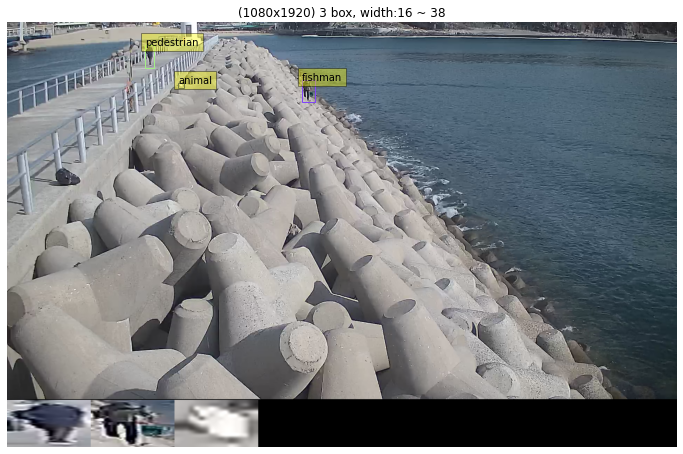

In [56]:
s = 20
e = -1
stride = 1000
display_data(input_x[s:e], input_y[s:e], stride=stride, target_cls=-1)